<img src="https://justaklikaway.files.wordpress.com/2014/05/shut-up-and-take-my-money.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Сюжетная арка 1: продажи </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Первой такой аркой будут продажи. Им будет посвящена первая серия из домашек и семинаров. 


### Задача:

Мы будем работать с датасетом __bikes_rent.csv__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.


#  Эпизод II (атака моделей) 

В прошлом задании мы предобработали данные. Пришло время оценивать по ним модели. ВПЕРЁД! 

In [1]:
import pandas as pd
import numpy as np 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

In [2]:
# чтобы нас не раздражали предупреждения, отключим их! 
import warnings
warnings.simplefilter("ignore")

In [3]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

Подгрузите данные для обучения модели, которые вы сохранили у себя на компьютере при решении первой домашки.  Удалите из выборки главные компоненты. Они нам не нужны.

In [6]:
df = pd.read_csv('../sem1&2_data_prepare/data_train.csv', sep='\t')

y = df['cnt'] # то, что прогнозируем 

# Удаляем лишние колонки 
df = df.drop(['cnt', 'pca_1', 'pca_2', 'pca_3'], axis=1)

# названия фичей для прогозирования
features = list(df.columns)  

# фичи
X = df.get_values()

__[1]__  Разбейте выборку на тренировочную и тестовую. В прошлый раз мы делали дополнительную выборку. Её подгружать не надо. Она для следующей домашки.

In [7]:
from sklearn.model_selection import train_test_split  # функция для деления 

# делим в пропорции 70 к 30
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size = 0.3)

__[1]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE. 

In [8]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им продажи
y_pred_naive[:5]

array([2010.96428571, 2010.96428571, 2010.96428571, 2010.96428571,
       2010.96428571])

In [9]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [10]:
rmse(y_test, y_pred_naive)

1053.9380635273121

__[1]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют? 

__Ответ:__ написал что-то о кросс-валидации

__[1]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

In [11]:
from sklearn.linear_model import LinearRegression # подгрузили модель

# Объявили модель
model = LinearRegression()

# Обучили модель на тренировочной выборке 
model.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred = model.predict(X_test)

In [12]:
rmse(y_test, y_pred)

595.9657892212309

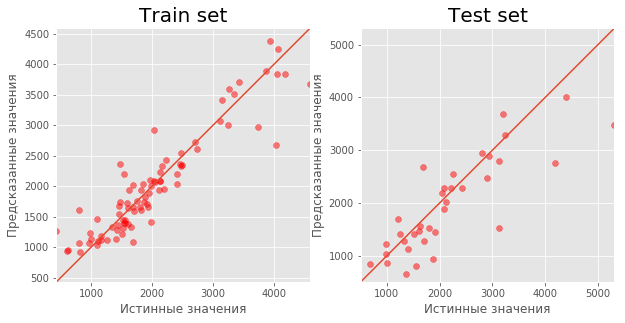

In [13]:
plot_yreal_ypred(y_test, y_train, y_pred, model.predict(X_train))

__[1]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло?  Чтобы вспомнить, вернитесь в первую домашку и посмотрите на корреляционную матрицу. 

__Ответ:__  Коэффициенты огромные! БОЖЕЧКИ-КОШЕЧКИ, кажется, мы переобучились! 

In [14]:
model.coef_

array([ 1.96856848e+02, -1.23886690e+02,  3.30144165e+01, -2.54347127e+13,
        5.68974523e+13,  1.65074823e+02,  1.64347275e+10,  1.70915041e+10,
        1.36358846e+10,  1.35417590e+10,  3.78177515e+09,  4.30188377e+09,
        2.18958289e+02,  3.39723160e+02,  7.21016477e+02, -9.72377063e+08,
        6.01798843e+08,  5.78310811e+08,  1.51675384e+09,  1.38480547e+09,
        1.79863692e+09, -1.79863738e+09, -1.79863731e+09, -1.79863724e+09,
       -1.79863735e+09, -1.79863727e+09,  9.75032686e+01,  1.79863735e+09,
       -1.82868470e+02, -5.27973001e+02,  8.99326922e+00, -5.13528961e+00,
       -3.47294755e-01,  6.99456065e+11, -3.50019636e+12,  3.05114976e+01])

In [15]:
for co, fe in zip(model.coef_, features):
    print(fe, round(co, 2))

temp 196.86
atemp -123.89
hum 33.01
windspeed(mph) -25434712710231.61
windspeed(ms) 56897452332829.57
season_2 165.07
season_3 16434727488.62
season_4 17091504085.89
yr_1 13635884585.19
mnth_10 13541759031.83
mnth_11 3781775147.53
mnth_12 4301883770.44
mnth_2 218.96
mnth_3 339.72
mnth_4 721.02
mnth_5 -972377062.94
mnth_6 601798842.98
mnth_7 578310810.6
mnth_8 1516753841.14
mnth_9 1384805471.82
holiday_1 1798636921.1
weekday_1 -1798637375.21
weekday_2 -1798637308.0
weekday_3 -1798637237.03
weekday_4 -1798637351.46
weekday_5 -1798637269.75
weekday_6 97.5
workingday_1 1798637350.65
weathersit_2 -182.87
weathersit_3 -527.97
temp_sq 8.99
atemp_sq -5.14
hum_sq -0.35
windspeed(mph)_sq 699456064702.48
windspeed(ms)_sq -3500196355858.99
super_nice_day 30.51


__[1]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$. 

* Каким получилось качество прогноза? 
* Что в модели произошло с коэффициентами?  

In [16]:
from sklearn.linear_model import Lasso  # подгрузили модель

# Объявили модель
model_lasso = Lasso(alpha=40)

# Обучили модель на тренировочной выборке 
model_lasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_lasso.predict(X_test)

In [17]:
rmse(y_test, y_pred_lasso)

657.4115403789625

In [18]:
for co, fe in zip(model_lasso.coef_, features):
    print(fe, round(co, 2))

temp 51.49
atemp 0.0
hum 39.42
windspeed(mph) 28.17
windspeed(ms) 0.0
season_2 95.36
season_3 0.0
season_4 0.0
yr_1 0.0
mnth_10 0.0
mnth_11 0.0
mnth_12 0.0
mnth_2 -0.0
mnth_3 0.0
mnth_4 0.0
mnth_5 0.0
mnth_6 0.0
mnth_7 0.0
mnth_8 0.0
mnth_9 0.0
holiday_1 -0.0
weekday_1 -0.0
weekday_2 0.0
weekday_3 0.0
weekday_4 -0.0
weekday_5 0.0
weekday_6 0.0
workingday_1 -0.0
weathersit_2 -0.0
weathersit_3 -0.0
temp_sq 12.72
atemp_sq -6.82
hum_sq -0.42
windspeed(mph)_sq -2.88
windspeed(ms)_sq -0.0
super_nice_day 0.0


__Ответ:__  

* Качество улучшилось по сравнению с наивным прогнозом. 
* Некоторые коэффициенты занулились, а все остальные больше не такие огромные 
* Занулились коэффициенты перед признаками, которые друг-друга дублируют. 
* Например, у нас было в данных две температуры. Осталась только одна. 

__[0]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом. 

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [19]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [20]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

Text(0.5, 1.0, 'Ridge')

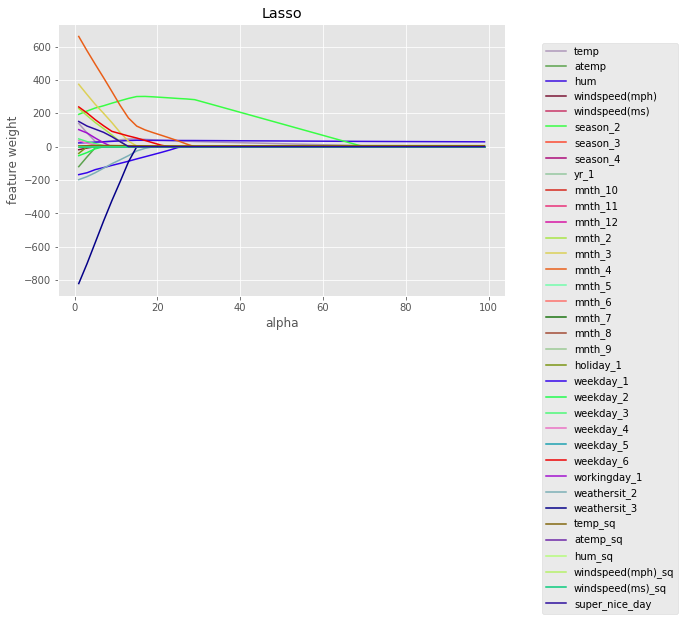

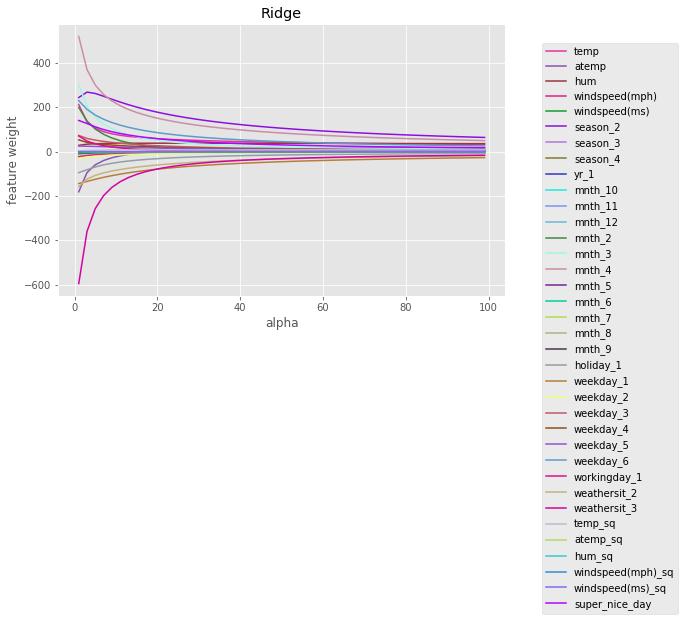

In [21]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним. 

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться. 

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__[1]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение? 
 

In [22]:
%%time
from sklearn.model_selection import GridSearchCV

alphas = np.arange(0.01, 3, 0.01)
# Решётака для перебора параметра 
param_grid = {'alpha': alphas}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_cv_lasso.fit(X_train, y_train)

CPU times: user 5.97 s, sys: 24.4 ms, total: 6 s
Wall time: 6.01 s


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)
np.sqrt(-1*grid_cv_lasso.best_score_)

Лучшее значение параметра: {'alpha': 2.9899999999999998}


534.7570881816365

__[1]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$? 

In [24]:
model = grid_cv_lasso.best_estimator_

y_pred = model.predict(X_test)
rmse(y_test, y_pred)

635.1170787509812

__[1]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились? 

In [25]:
for co, fe in zip(model.coef_, features):
    print(fe, round(co, 2))

temp 203.56
atemp -144.7
hum 27.84
windspeed(mph) 51.24
windspeed(ms) 0.0
season_2 176.61
season_3 0.0
season_4 0.0
yr_1 0.0
mnth_10 0.0
mnth_11 0.0
mnth_12 0.0
mnth_2 140.08
mnth_3 230.48
mnth_4 524.01
mnth_5 0.0
mnth_6 0.0
mnth_7 0.0
mnth_8 0.0
mnth_9 0.0
holiday_1 -85.36
weekday_1 -123.09
weekday_2 -0.0
weekday_3 10.49
weekday_4 -0.0
weekday_5 60.88
weekday_6 27.08
workingday_1 22.92
weathersit_2 -157.13
weathersit_3 -627.48
temp_sq 8.64
atemp_sq -4.3
hum_sq -0.3
windspeed(mph)_sq -3.65
windspeed(ms)_sq -0.0
super_nice_day 17.73


__Ответ:__ есть любые адекватные рассуждения. 

__[1]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение? 

__Ответ:__ Да. Формула для зависимости получилась такой: $-1.29 \cdot x^2 - 4.58 \cdot x$. ни перед `windspeed(mph)_sq` ни перед `windspeed(mph)` коэффициент не занулился.  Перед квадратом отрицательный знак. Это означает, что у параболы ветви направлены вниз и спрос поначалу растёт, а потом, начиная с какой-то точки насыщения, начинает убывать. 

__Для ассистента:__ понятное дело, что у ребят коэффициенты могут получиться другими, так как random_seed не зафиксирован. 

__[0]__ Сохраните лучшую модель на компьютере. Она понадобится нам для решения последней части этой домашки. 

In [26]:
from sklearn.externals import joblib

joblib.dump(model, 'model_hw.pkl') 

['model_hw.pkl']

# Заключение

Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно, по возможности, не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации. 

Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3), потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель, а это времязатратный процесс, особенно если нужно обучаться на больших объемах данных.

# Обратная связь 

Выстрадал код? Расскажи о страданиях [в анонимке](https://docs.google.com/forms/d/e/1FAIpQLSeDLENjGbfgdEvR6UgMuo5D8u6F91-ExCoqd7dDHxWnheRwZQ/viewform)